In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Charger les données
data = pd.read_csv('/content/Customers (1).csv')

# Sélectionner les variables à inclure dans l'ACP
features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
x = data.loc[:, features].values

# Centrer et réduire les données
x = StandardScaler().fit_transform(x)

In [6]:

# Appliquer l'ACP
pca = PCA()
principalComponents = pca.fit_transform(x)

# Calculer la proportion de variance expliquée pour chaque composante
explained_variances = pca.explained_variance_ratio_


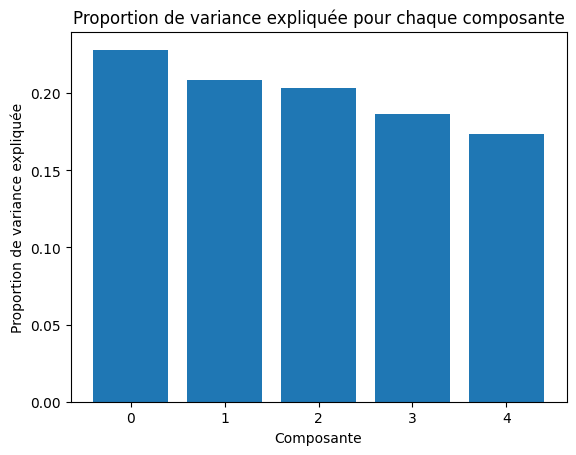

Nombre de composantes à garder : 4
Nouveau dataframe :
        PC1       PC2       PC3       PC4  Age  Annual Income ($)  \
0  1.915036 -0.137402  0.026034  1.386276   19              15000   
1  1.703303  1.038038 -0.248960  0.184355   21              35000   
2  1.641518 -0.489402  1.264448  0.790860   20              86000   
3  1.953950  0.906296 -0.493196  0.021750   23              59000   
4  0.823122 -0.348055 -0.410406  1.576363   31              38000   

   Spending Score (1-100)  Work Experience  Family Size  
0                      39                1            4  
1                      81                3            3  
2                       6                1            1  
3                      77                0            2  
4                      40                2            6  

Moyennes de chaque variable par cluster :
              PC1       PC2       PC3       PC4        Age  Annual Income ($)  \
Cluster                                                   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

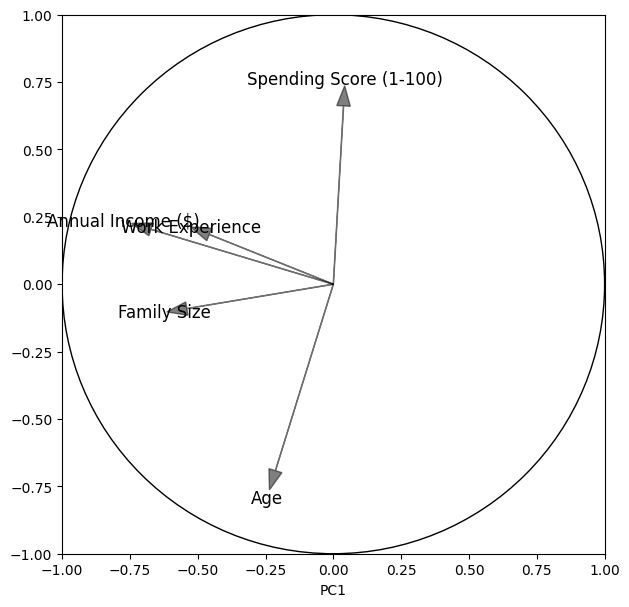

In [8]:

# Tracer un graphique pour illustrer la proportion de variance expliquée
plt.bar(range(len(explained_variances)), explained_variances)
plt.title("Proportion de variance expliquée pour chaque composante")
plt.xlabel("Composante")
plt.ylabel("Proportion de variance expliquée")
plt.show()

# Sélectionner le nombre de composantes à garder pour avoir une proportion de variance expliquée suffisante
explained_variances_cumulative = np.cumsum(explained_variances)
n_components = np.argmax(explained_variances_cumulative > 0.8) + 1
print(f"Nombre de composantes à garder : {n_components}")

# Réappliquer l'ACP avec le nombre de composantes sélectionné
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

# Ajouter les composantes principales au dataframe original
columns = [f"PC{i}" for i in range(1, n_components+1)]
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
finalDf = pd.concat([principalDf, data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']]], axis = 1)

# Afficher les premières lignes du nouveau dataframe
print("Nouveau dataframe :")
print(finalDf.head())

# Effectuer une classification non supervisée pour identifier des groupes de clients similaires
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(principalComponents)
clusters = kmeans.predict(principalComponents)

# Ajouter les identifiants de cluster au dataframe final
finalDf['Cluster'] = clusters

# Afficher les moyennes de chaque variable par cluster
print("\nMoyennes de chaque variable par cluster :")
print(finalDf.groupby('Cluster').mean())

# Ajouter le premier plan et le cercle de corrélation
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

for i in range(len(features)):
    ax.arrow(0, 0, pca.components_[0,i], pca.components_[1,i],color = 'black',alpha = 0.5, head_width=0.05)
    plt.text(pca.components_[0,i]* 1.15, pca.components_[1,i] * 1.15, features[i], color = 'black', ha = 'center', va = 'center', fontsize=12)

circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='black')
ax.add_artist(circle)

plt.xlabel("PC1")
plt


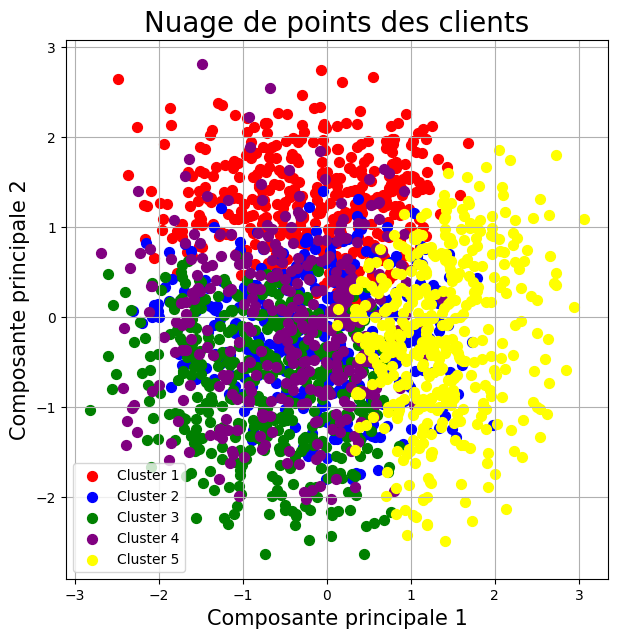

In [9]:

# Afficher un nuage de points en fonction des deux premières composantes principales, coloré par cluster
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Composante principale 1', fontsize = 15)
ax.set_ylabel('Composante principale 2', fontsize = 15)
ax.set_title('Nuage de points des clients', fontsize = 20)

colors = ['red', 'blue', 'green', 'purple', 'yellow'] # Couleurs pour les 5 clusters
for cluster, color in zip(range(5), colors):
    indices = finalDf['Cluster'] == cluster
    ax.scatter(finalDf.loc[indices, 'PC1'], finalDf.loc[indices, 'PC2'], c = color, s = 50)

ax.legend(labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
ax.grid()
plt.show()